## 📄 Dataset Overview: Used Car Price Prediction
For this project, I am using the Used Car Price Prediction Dataset sourced from Kaggle. The dataset is a collection of real-world used car listings from the popular automobile marketplace website https://www.cars.com. The dataset includes 9 distinct and informative feature variables that can be effectively used to predict a car's price.

Total Instances (Rows): 4,009

Total Features (Columns): 9 (excluding the target variable)

Kaggle Dataset: https://www.kaggle.com/datasets/taeefnajib/used-car-price-prediction-dataset/data

### 🔍 Features:

Brand: Manufacturer company names (e.g. Toyota, Camry, BMW)

Model: Specific Model of the car (e.g. Rover LR4 HSE, RC 350 F Sport)

Model Year: Manufacturing year, crucial feature for assessing depreciation and technology (YYYY)

Mileage: otal distance the car has been driven. A key factor to identify wear & tear of vehicle (in miles)

Fuel Type: Type of fuel used (e.g., Gasoline, Diesel, Hybrid)

Engine Type: Engine specifications (e.g., V6, 4-Cylinder)

Transmission: Type of transmission (e.g., automatic, manual)

Exterior & Interior Colors: aesthetic of cars

Accident History: Accident recorded in past or damage, crucial for informed decision-making. (Yes/No)

Clean Title: Informs about the vehicle's resale value and legal status (Yes/No)

### 🎯 Target Variable:

Price: The listed price of the vehicle in USD (continuous numeric variable)

### 🔧  Prediction Task
Objective: I aim to build a machine learning X model to predict the price of a used car based on its features. This model can assist buyers and sellers in estimating the fair value of a vehicle by analyzing historical data.

  ## 1. Load the Data

In [1]:
import pandas as pd                        # Importing libraries
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import re

In [2]:
df = pd.read_csv("used_cars.csv")          # Loading datset 
df.head()                                  # Verify the dataset 

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [3]:
df.shape               # Rows : 4009 , Columns = 12

(4009, 12)

## 2. Explore the Data (EDA)

In [4]:
df.info()                     # Checking datatype for columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


#### 2.1 Data Cleaning & Pre-Processing

##### We can see Milage & Price has Object Datatype but we can covert it to Integer for easy of analysis

In [5]:
df[['milage', 'price']]

,milage,price
0,"51,000 mi.","$10,300"
1,"34,742 mi.","$38,005"
2,"22,372 mi.","$54,598"
3,"88,900 mi.","$15,500"
4,"9,835 mi.","$34,999"
...,...,...
4004,714 mi.,"$349,950"
4005,"10,900 mi.","$53,900"
4006,"2,116 mi.","$90,998"
4007,"33,000 mi.","$62,999"


In [6]:
df['milage']= df['milage'].replace([',',' mi.'], ['',''], regex=True).astype(int)    # Replace comma (,) and " mi." with an empty string ''

In [7]:
df.price

0        $10,300
1        $38,005
2        $54,598
3        $15,500
4        $34,999
          ...   
4004    $349,950
4005     $53,900
4006     $90,998
4007     $62,999
4008     $40,000
Name: price, Length: 4009, dtype: object

In [8]:
df['price'] = df['price'].replace(r'[$,]', '', regex=True).astype(int)     # Replace dollar sign ($) and (,) to empty string ''

In [9]:
df[['milage', 'price']]

,milage,price
0,51000,10300
1,34742,38005
2,22372,54598
3,88900,15500
4,9835,34999
...,...,...
4004,714,349950
4005,10900,53900
4006,2116,90998
4007,33000,62999


In [10]:
df[['milage', 'price']].dtypes        # Successfully converted milage & price in INT type  

milage    int64
price     int64
dtype: object

#### 2.1.1 Checking for null values in dataset

In [11]:
df.isnull().sum()


brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [12]:
df[['fuel_type','accident','clean_title']]

,fuel_type,accident,clean_title
0,E85 Flex Fuel,At least 1 accident or damage reported,Yes
1,Gasoline,At least 1 accident or damage reported,Yes
2,Gasoline,None reported,NaN
3,Hybrid,None reported,Yes
4,Gasoline,None reported,NaN
...,...,...,...
4004,Gasoline,None reported,Yes
4005,Gasoline,None reported,Yes
4006,NaN,None reported,NaN
4007,Gasoline,None reported,Yes


### Reason for droping null columns 

##### The Fuel Type, Accident History, and Clean Title columns play a significant role in predicting our dependent variable, Estimated Price (Y).

##### To ensure high accuracy in our price prediction model — especially in a business context where even small prediction errors can lead to significant financial losses — we have decided to drop all rows containing null values in these critical columns.

##### Imputing or assuming values for such sensitive attributes could distort the model's understanding and lead to unrealistic predictions. Since our goal is to assist a company in accurately estimating used car prices, maintaining data integrity is a top priority.

In [13]:
df.dropna(subset=['fuel_type', 'accident'], inplace =True)

In [14]:
df['clean_title'] = df['clean_title'].fillna('No')

In [15]:
df.isnull().sum()      # Now have clean dataset we accurate values  

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [16]:
# Check before removal
original_count = len(df)
print("Original row count:", original_count)

df = df[~df.apply(lambda row: row.astype(str).str.contains('–').any(), axis=1)]

# Check after removal
print("Rows removed:", original_count - len(df))
print("New row count:", len(df))

Original row count: 3730
Rows removed: 170
New row count: 3560


#### 2.1.2 Checking for duplicates

In [17]:
df.duplicated().sum()    # Checking for duplicate rows in dataset 

np.int64(0)

#### 2.1.3 Transmission Column Standardization

This code standardizes the transmission types in the dataset by consolidating similar values into consistent categories:

In [18]:
# Display count of unique transmission types before cleaning
print('Total Groups Before using replace function:\n', len(df['transmission'].unique()))

# Standardize transmission values
df['transmission'] = df['transmission'].str.replace('Automatic', 'A/T')
df['transmission'] = df['transmission'].str.replace('-Spd', '-Speed')
df['transmission'] = df['transmission'].str.replace('Manual', 'M/T')
df['transmission'] = df['transmission'].str.replace('6 Speed Mt', '6-Speed M/T')

# Display count after standardization
print('Total Groups After using replace function:\n', len(df['transmission'].unique()))

Total Groups Before using replace function:
 51
Total Groups After using replace function:
 39


In [19]:
df[['transmission']]

,transmission
0,6-Speed A/T
1,8-Speed A/T
2,A/T
3,7-Speed A/T
4,8-Speed A/T
...,...
4003,A/T
4004,8-Speed A/T with Auto-Shift
4005,Transmission w/Dual Shift Mode
4007,A/T


#### 2.1.4 Checking Outliers

In [20]:
df.dtypes      

brand           object
model           object
model_year       int64
milage           int64
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price            int64
dtype: object

#### Checking the outliers for 'milage' & 'price' columns because both represent numerical, impact pricing, and can distort model accuracy if extreme or incorrect values are present.

In [21]:
columns_to_check = ['price', 'milage']

for column in columns_to_check:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Keep only rows within the IQR bounds
    df = df[(df[column] >= lower) & (df[column] <= upper)]

# Reset the index after dropping outliers
df.reset_index(drop=True, inplace=True)

# Check the shape after cleaning
print("Shape after dropping outliers:", df.shape)


Shape after dropping outliers: (3281, 12)


## 3. Data Visualization

In [22]:
df.describe()                # Checking  Discriptive statistics

,model_year,milage,price
count,3281.000000,3281.000000,3281.000000
mean,2015.352636,67083.682109,32891.125571
std,5.709507,46974.277390,20473.954883
min,1996.000000,100.000000,2000.000000
25%,2012.000000,28500.000000,16500.000000
50%,2017.000000,59000.000000,29000.000000
75%,2020.000000,96653.000000,44900.000000
max,2024.000000,204000.000000,96000.000000


#### 3.1 Univariate Analysis (Single Variable Distributions)

##### 3.1.1 Identifying Car Brand Distribution 

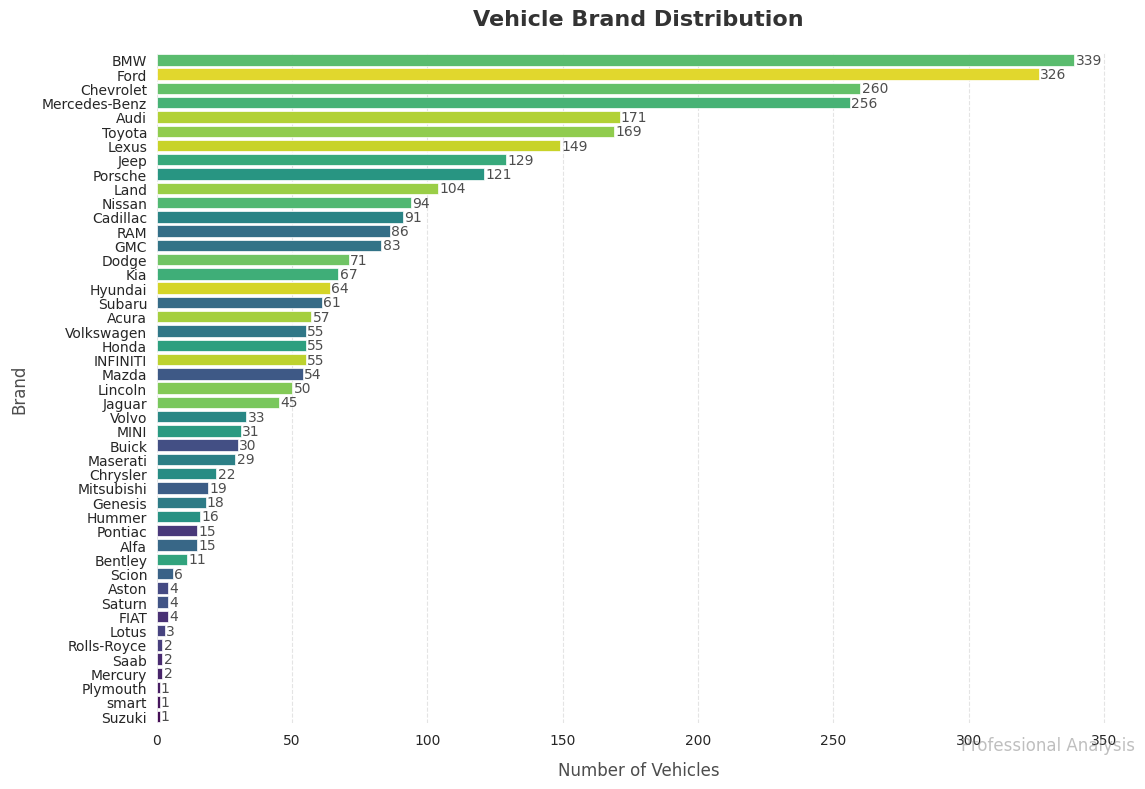

In [23]:

# Set professional theme
sns.set_style("whitegrid", {
    'axes.edgecolor': '0.3',
    'axes.labelcolor': '0.3',
    'text.color': '0.3',
    'grid.color': '0.85',
    'font.family': ['DejaVu Sans', 'Arial', 'sans-serif']
})

plt.figure(figsize=(12, 8), facecolor='white')

# Create countplot with professional color palette
ax = sns.countplot(
    y='brand',
    data=df,
    order=df['brand'].value_counts().index,
    hue='brand',
    palette='viridis_r',  # Professional sequential palette
    saturation=0.85,
    legend=False,
    edgecolor='white',
    linewidth=0.5
)

# Add value annotations
for i, p in enumerate(ax.patches):
    width = p.get_width()
    ax.text(width + 0.5, 
            p.get_y() + p.get_height()/2., 
            f'{int(width)}', 
            ha='left', 
            va='center',
            color='0.3',
            fontsize=10)

# Style the plot
plt.title('Vehicle Brand Distribution', 
          pad=20, 
          fontsize=16,
          fontweight='semibold',
          color='0.2')
plt.xlabel('Number of Vehicles', 
           labelpad=10, 
           fontsize=12,
           color='0.3')
plt.ylabel('Brand', 
           labelpad=10, 
           fontsize=12,
           color='0.3')

# Custom grid and spines
ax.xaxis.grid(True, linestyle='--', alpha=0.7)
ax.yaxis.grid(False)
sns.despine(left=True, bottom=True)

# Add watermark
plt.text(0.95, 0.05, 'Professional Analysis', 
         transform=plt.gcf().transFigure,
         fontsize=12, 
         color='gray',
         alpha=0.5,
         ha='right',
         va='bottom')

plt.tight_layout()
plt.show()

##### 3.1.2 Distribution by Fuel Type

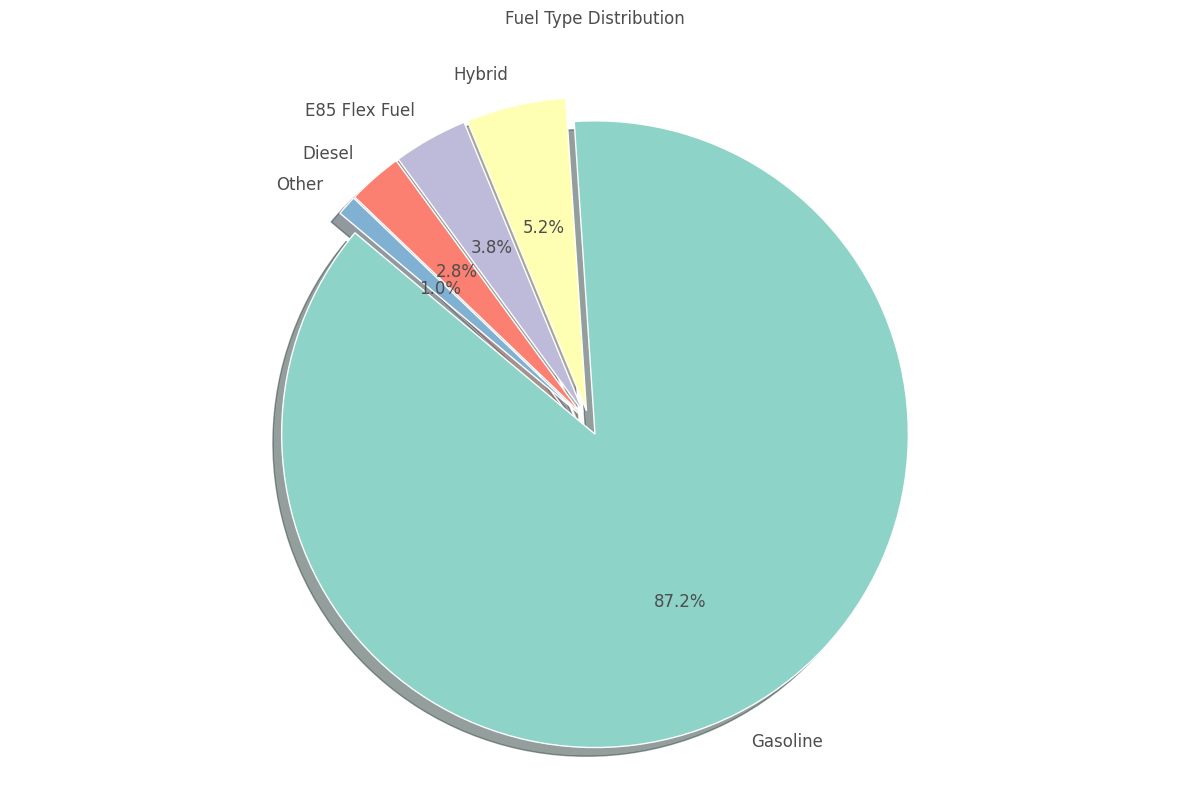

In [24]:
# Count the number of occurrences for each fuel type
fuel_counts = df['fuel_type'].value_counts()

# Make a copy so the original counts remain unchanged
fuel_counts_clean = fuel_counts.copy()

# Set any fuel type with less than 50 occurrences to 0 (these will be grouped into 'Other')
fuel_counts_clean[fuel_counts_clean < 50] = 0

# Calculate the total count of all rare fuel types (those set to 0 above)
other_count = fuel_counts.sum() - fuel_counts_clean.sum()

# Remove all fuel types that were set to 0 (i.e., rare ones)
fuel_counts_clean = fuel_counts_clean[fuel_counts_clean > 0]

# Add a new category 'Other' and assign it the combined count of rare fuel types
fuel_counts_clean['Other'] = other_count

plt.figure(figsize=(12, 8))

explode = [0.04] * len(fuel_counts_clean)  # Slightly separate all slices

# Plot the pie chart
plt.pie(
    fuel_counts_clean,
    labels=fuel_counts_clean.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('Set3'),
    explode=explode,
    shadow=True,
    textprops={'fontsize': 12}
)

# Move the title up using pad
plt.title('Fuel Type Distribution', pad=30)

plt.axis('equal')  # Make pie chart circular
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


##### 3.1.3 Bar chart distribution based on Accident History & Clean Title 

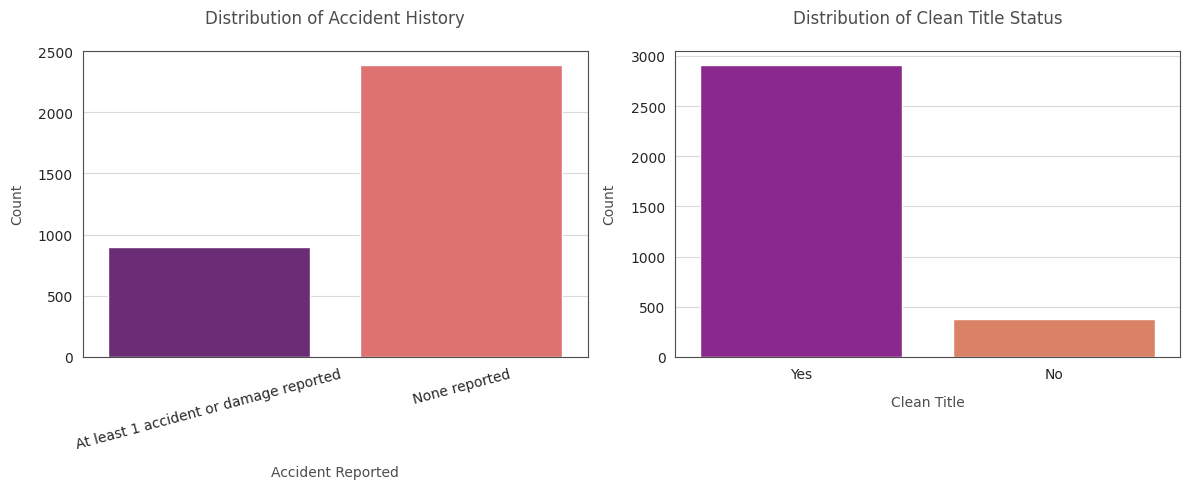

In [25]:
plt.figure(figsize=(12, 5))

# 1. Accident History Bar Plot
plt.subplot(1, 2, 1)
ax = sns.countplot(data=df, x='accident', hue='accident', palette='magma', legend=False)
plt.title('Distribution of Accident History', pad=20)
plt.xlabel('Accident Reported', labelpad=10)
plt.ylabel('Count', labelpad=10)
plt.xticks(rotation=15)

# 2. Clean Title Bar Plot
plt.subplot(1, 2, 2)
ax = sns.countplot(data=df, x='clean_title', hue='clean_title', palette='plasma', legend=False)
plt.title('Distribution of Clean Title Status', pad=20)
plt.xlabel('Clean Title', labelpad=10)
plt.ylabel('Count', labelpad=10)

plt.tight_layout()
plt.show()

##### 3.1.4 Bar chart distribution based on Transmission 

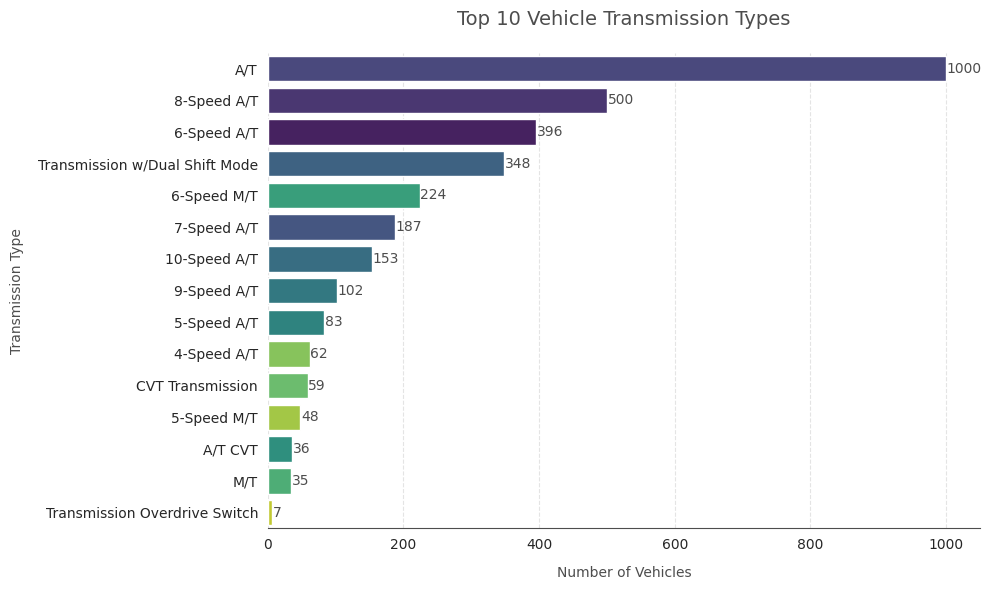


Top 15 Transmission Types by Count:
transmission
A/T                               1000
8-Speed A/T                        500
6-Speed A/T                        396
Transmission w/Dual Shift Mode     348
6-Speed M/T                        224
7-Speed A/T                        187
10-Speed A/T                       153
9-Speed A/T                        102
5-Speed A/T                         83
4-Speed A/T                         62
CVT Transmission                    59
5-Speed M/T                         48
A/T CVT                             36
M/T                                 35
Transmission Overdrive Switch        7
Name: count, dtype: int64


In [26]:
plt.figure(figsize=(10, 6))

# Get top 10 transmission types
top_transmissions = df['transmission'].value_counts().head(15).index

ax = sns.countplot(
    data=df[df['transmission'].isin(top_transmissions)],  # Filter for top 10
    y='transmission',
    hue='transmission',
    palette='viridis',
    legend=False,
    order=top_transmissions  # Use our pre-computed top 10
)

# Add value annotations
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 1, 
            p.get_y() + p.get_height()/2., 
            f'{int(width)}', 
            ha='left', 
            va='center')

plt.title('Top 10 Vehicle Transmission Types', pad=20, fontsize=14)
plt.xlabel('Number of Vehicles', labelpad=10)
plt.ylabel('Transmission Type', labelpad=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)

sns.despine(left=True)
plt.tight_layout()
plt.show()

# Print the exact counts for reference
print("\nTop 15 Transmission Types by Count:")
print(df['transmission'].value_counts().head(15))

##### 3.1.5 Histogram: Price and Milage 

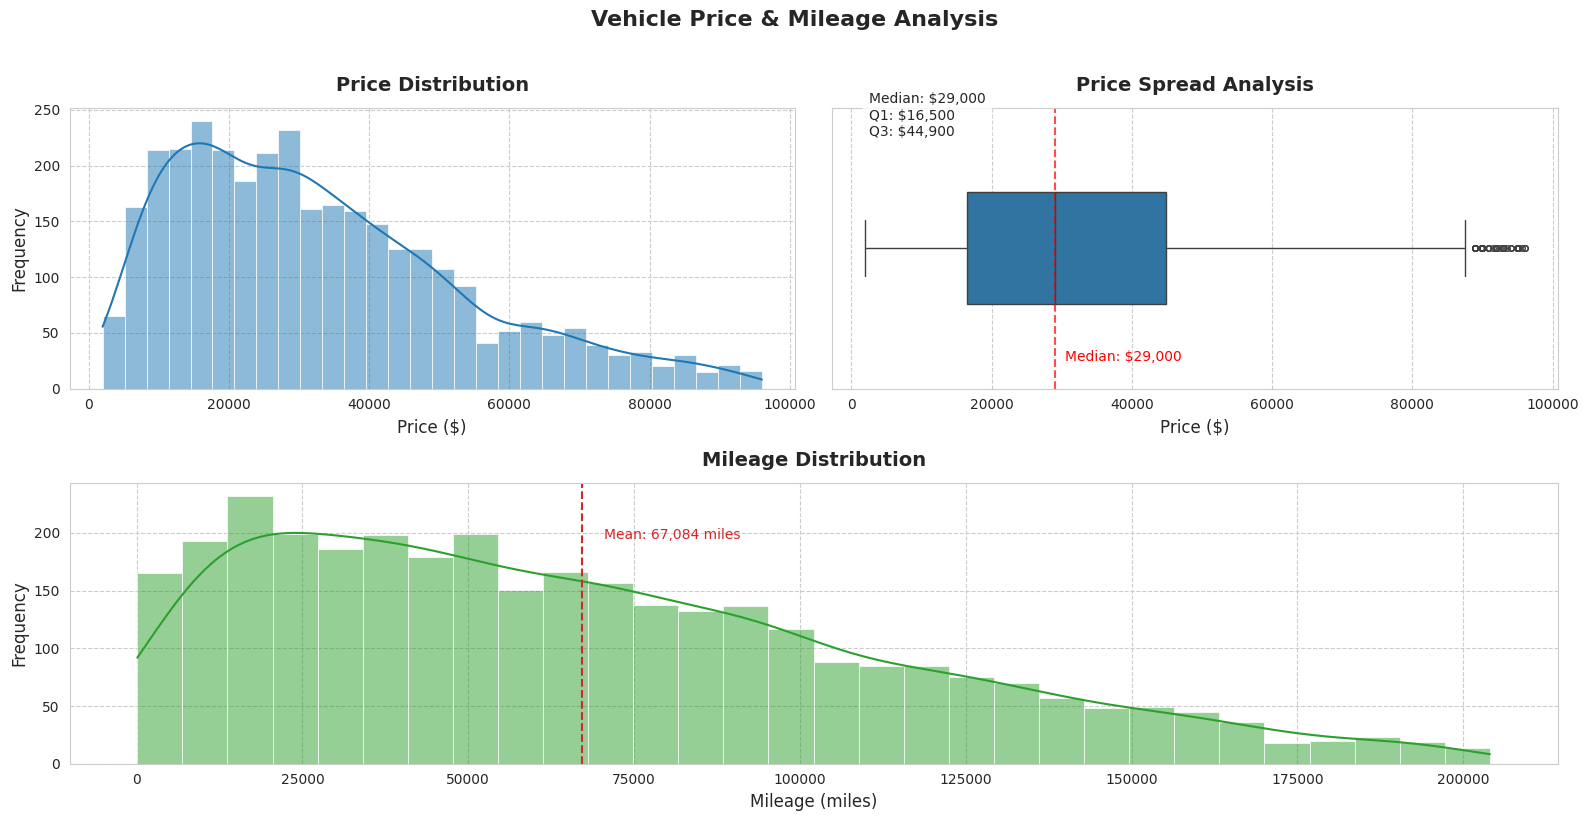

In [27]:
# Set professional style
sns.set_style("whitegrid", {'grid.linestyle': '--', 'grid.alpha': 0.4})
plt.rcParams['font.family'] = 'DejaVu Sans'  # Clean font style

# Create figure
fig = plt.figure(figsize=(16, 8), facecolor='white')
gs = fig.add_gridspec(2, 2)

# Color palette (professional blues)
price_color = '#1f77b4'  # Seaborn blue
mileage_color = '#2ca02c'  # Seaborn green

# --- Price Distribution ---
# Histogram
ax1 = fig.add_subplot(gs[0, 0])
sns.histplot(df['price'], bins=30, kde=True, 
             color=price_color, edgecolor='white', linewidth=0.5)
ax1.set_title('Price Distribution', fontsize=14, pad=12, fontweight='semibold')
ax1.set_xlabel('Price ($)', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)

# Boxplot
ax2 = fig.add_subplot(gs[0, 1])
sns.boxplot(x=df['price'], color=price_color, width=0.4, 
            flierprops={'marker': 'o', 'markersize': 4})
ax2.set_title('Price Spread Analysis', fontsize=14, pad=12, fontweight='semibold')
ax2.set_xlabel('Price ($)', fontsize=12)

# Add median line annotation
median = df['price'].median()
ax2.axvline(median, color='red', linestyle='--', alpha=0.7)
ax2.text(median*1.05, 0.4, f'Median: ${median:,.0f}', color='red')

# Add statistics
median = df['price'].median()
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
ax2.text(0.05, 0.9, f'Median: ${median:,.0f}\nQ1: ${q1:,.0f}\nQ3: ${q3:,.0f}',
         transform=ax2.transAxes, bbox=dict(facecolor='white', alpha=0.8))

# --- Mileage Distribution ---
ax3 = fig.add_subplot(gs[1, :])
sns.histplot(df['milage'], bins=30, kde=True, 
             color=mileage_color, edgecolor='white', linewidth=0.5)
ax3.set_title('Mileage Distribution', fontsize=14, pad=12, fontweight='semibold')
ax3.set_xlabel('Mileage (miles)', fontsize=12)
ax3.set_ylabel('Frequency', fontsize=12)

# Add distribution metrics
mean = df['milage'].mean()
ax3.axvline(mean, color='#d62728', linestyle='--', linewidth=1.5)
ax3.text(mean*1.05, ax3.get_ylim()[1]*0.8, 
         f'Mean: {mean:,.0f} miles', color='#d62728')

# Final polish
plt.suptitle('Vehicle Price & Mileage Analysis', y=1.02, 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

##### 3.1.6 Histogram: Model and HorsePower (HP) 

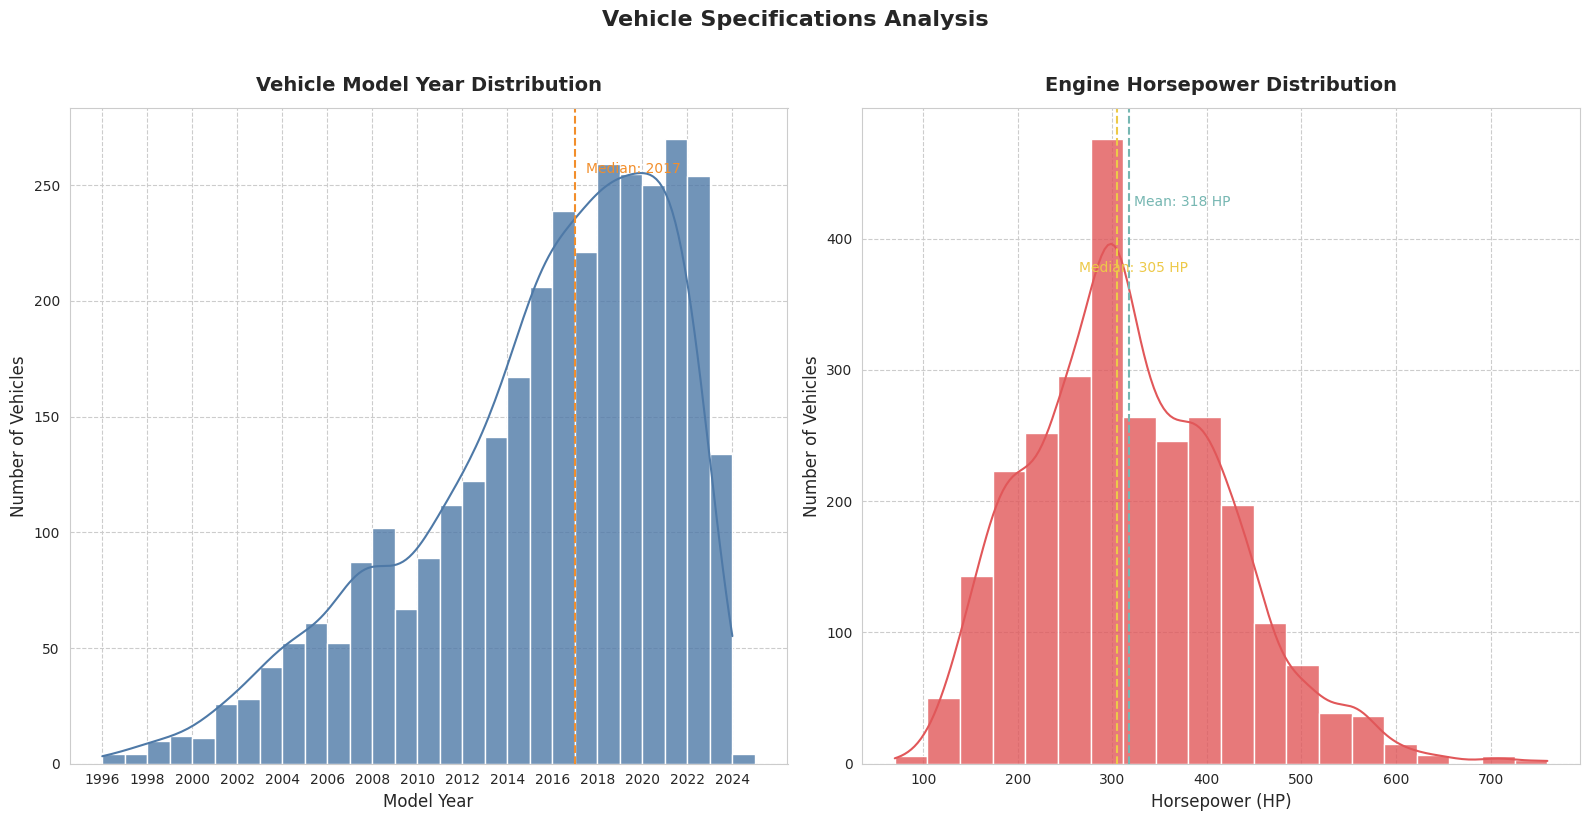

In [28]:
# Set professional style
sns.set_style("whitegrid", {'grid.linestyle': '--', 'grid.alpha': 0.3})
plt.rcParams['font.family'] = 'DejaVu Sans'

# Create figure
fig = plt.figure(figsize=(16, 8), facecolor='white')
gs = fig.add_gridspec(1, 2)

# Color palette
year_color = '#4e79a7'  # Professional blue
hp_color = '#e15759'    # Professional red

# --- Model Year Distribution ---
ax1 = fig.add_subplot(gs[0, 0])
sns.histplot(df['model_year'], bins=range(min(df['model_year']), max(df['model_year'])+2, 1), 
             color=year_color, edgecolor='white', alpha=0.8, kde=True)
ax1.set_title('Vehicle Model Year Distribution', fontsize=14, pad=12, fontweight='semibold')
ax1.set_xlabel('Model Year', fontsize=12)
ax1.set_ylabel('Number of Vehicles', fontsize=12)
ax1.set_xticks(range(min(df['model_year']), max(df['model_year'])+1, 2))  # Show every 2 years

# Add median year line
median_year = df['model_year'].median()
ax1.axvline(median_year, color='#f28e2b', linestyle='--', linewidth=1.5)
ax1.text(median_year+0.5, ax1.get_ylim()[1]*0.9, 
         f'Median: {int(median_year)}', color='#f28e2b')

# --- Engine Power Distribution ---
# Extract horsepower from engine column
df['horsepower'] = df['engine'].apply(lambda x: int(re.search(r'(\d+)\.?\d*HP', str(x)).group(1)) 
                          if re.search(r'(\d+)\.?\d*HP', str(x)) else None)

ax2 = fig.add_subplot(gs[0, 1])
sns.histplot(df['horsepower'].dropna(), bins=20, color=hp_color, 
             edgecolor='white', alpha=0.8, kde=True)
ax2.set_title('Engine Horsepower Distribution', fontsize=14, pad=12, fontweight='semibold')
ax2.set_xlabel('Horsepower (HP)', fontsize=12)
ax2.set_ylabel('Number of Vehicles', fontsize=12)

# Add mean and median lines
mean_hp = df['horsepower'].mean()
median_hp = df['horsepower'].median()
ax2.axvline(mean_hp, color='#76b7b2', linestyle='--', linewidth=1.5)
ax2.axvline(median_hp, color='#edc948', linestyle='--', linewidth=1.5)
ax2.text(mean_hp+5, ax2.get_ylim()[1]*0.85, f'Mean: {mean_hp:.0f} HP', color='#76b7b2')
ax2.text(median_hp-40, ax2.get_ylim()[1]*0.75, f'Median: {median_hp:.0f} HP', color='#edc948')

# Final polish
plt.suptitle('Vehicle Specifications Analysis', y=1.02, 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

#### 3.2 Bivariate Analysis (Relationships Between Variables)

##### 3.2.1 Scatter Plot Price VS Milage

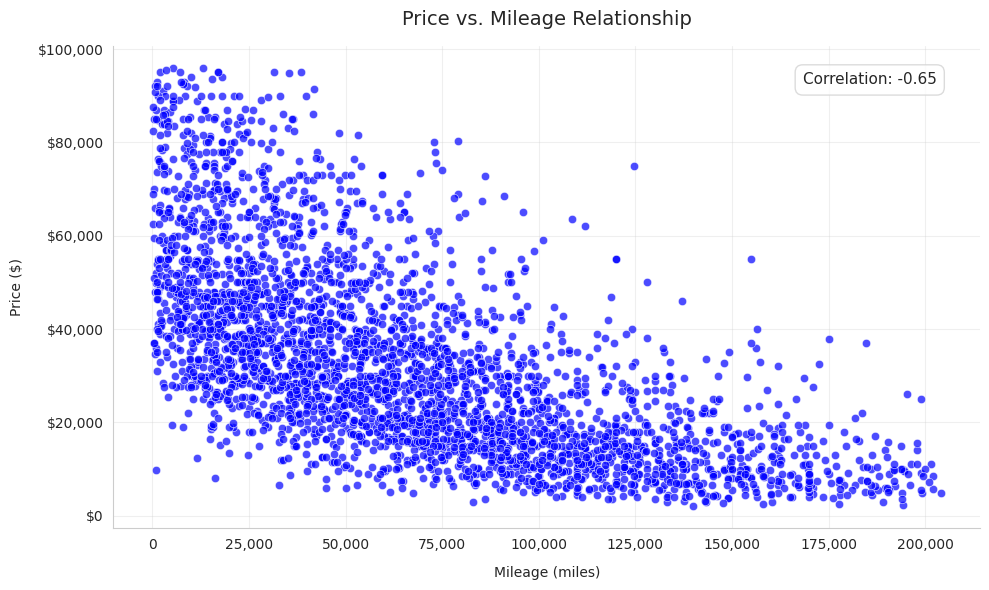

In [29]:
# Set professional style
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['grid.alpha'] = 0.3

# Create plot
plt.figure(figsize=(10, 6))

# Scatterplot
ax = sns.scatterplot(
    x='milage',
    y='price',
    data=df,
    alpha=0.7,
    color='blue',
    edgecolor='white',
    linewidth=0.5
)

# Calculate correlation
valid_data = df[['milage', 'price']].dropna()
corr = np.corrcoef(valid_data['milage'], valid_data['price'])[0, 1]

# Add correlation annotation (RIGHT TOP CORNER)
ax.text(0.95, 0.92,  # Changed x-position from 0.05 to 0.95 for right alignment
        f'Correlation: {corr:.2f}',
        transform=ax.transAxes,
        bbox=dict(facecolor='white', alpha=0.8, 
                 edgecolor='lightgray', boxstyle='round,pad=0.5'),
        fontsize=11,
        ha='right')  # Right-align text within the box

# Formatting
plt.title('Price vs. Mileage Relationship', fontsize=14, pad=15)
plt.xlabel('Mileage (miles)', labelpad=10)
plt.ylabel('Price ($)', labelpad=10)

# Format axes
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"${y:,.0f}"))
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:,.0f}"))

# Final polish
sns.despine()
plt.tight_layout()
plt.show()

##### 3.2.2 ScatterPlot for Price VS Model Year 

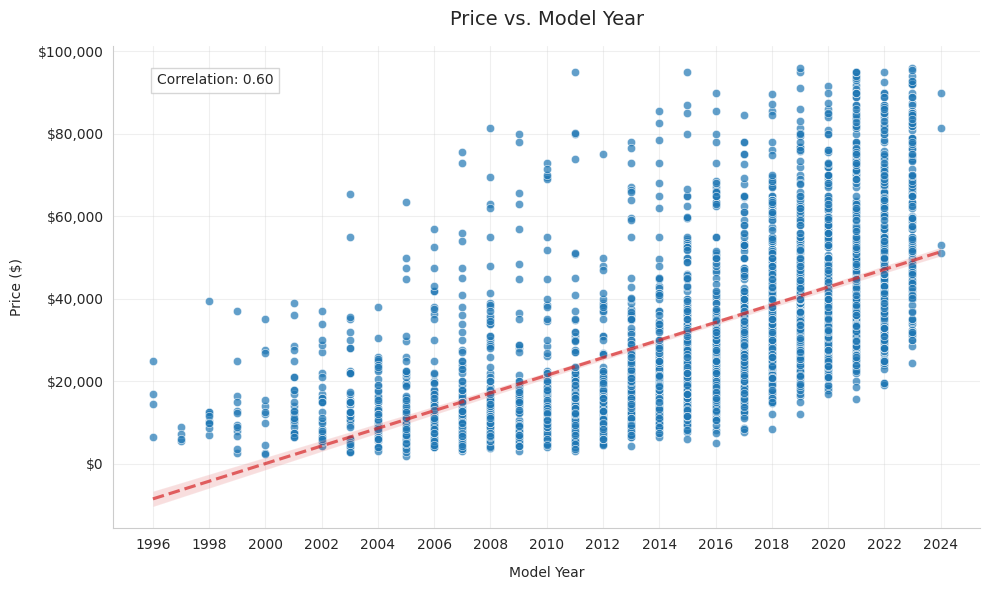

In [30]:
# Set style
sns.set_style("whitegrid", {'grid.alpha': 0.3})
plt.rc('font', family='DejaVu Sans')

# Create plot
plt.figure(figsize=(10, 6), facecolor='white')

# Simple scatter plot
ax = sns.scatterplot(
    x='model_year',
    y='price',
    data=df,
    color='#1f77b4',  # Professional blue
    alpha=0.7,
    edgecolor='white',
    linewidth=0.5
)

# Add regression line
sns.regplot(
    x='model_year',
    y='price',
    data=df,
    scatter=False,
    color='#d62728',  # Red trend line
    line_kws={'linestyle': '--', 'alpha': 0.7}
)

# Formatting
plt.title('Price vs. Model Year', fontsize=14, pad=15)
plt.xlabel('Model Year', labelpad=10)
plt.ylabel('Price ($)', labelpad=10)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"${y:,.0f}"))

# Set x-axis ticks (every 2 years)
min_year = int(df['model_year'].min())
max_year = int(df['model_year'].max())
plt.xticks(range(min_year, max_year+1, 2))

# Add correlation in TOP-LEFT (changed x=0.05, y=0.92)
corr = df[['model_year', 'price']].corr().iloc[0,1]
plt.text(0.05, 0.92, 
        f'Correlation: {corr:.2f}',
        transform=ax.transAxes,
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='0.8'),
        ha='left')  # Left-aligned text

# Remove legend (not needed)
ax.legend_.remove() if ax.legend_ else None

sns.despine()
plt.tight_layout()
plt.show()

##### 3.2.3 Box Plot: Price VS Fuel Type 

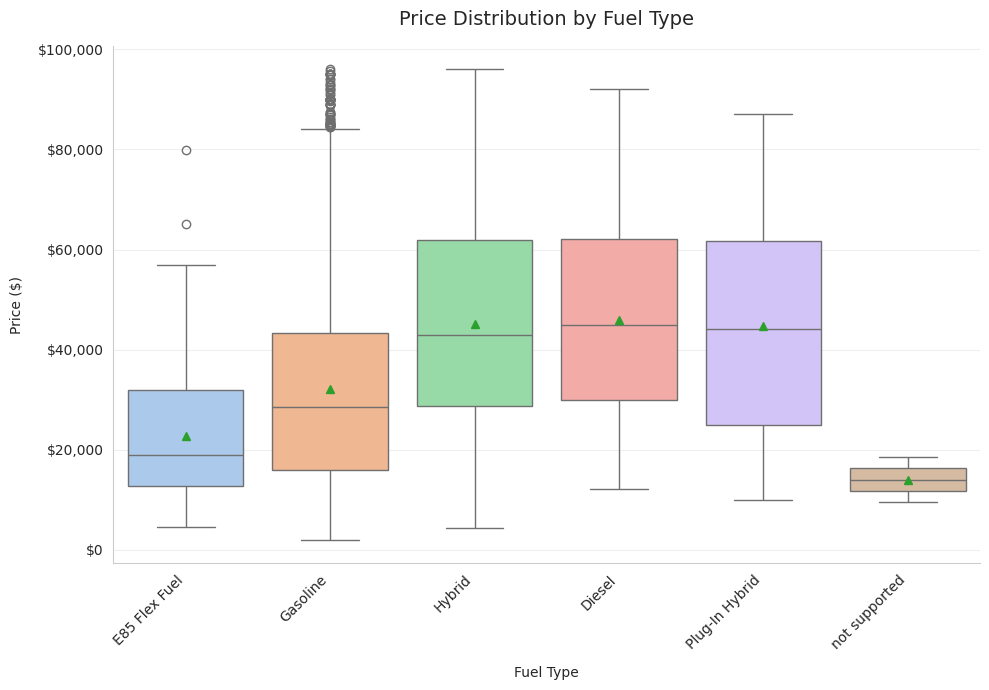

In [31]:
# Set style
sns.set_style("whitegrid", {'grid.alpha': 0.3})
plt.rc('font', family='DejaVu Sans')

# Create plot with adjusted height
plt.figure(figsize=(10, 7), facecolor='white')

# Boxplot with corrected palette usage
ax = sns.boxplot(
    x='fuel_type',
    y='price',
    hue='fuel_type',  # Assign hue to fuel_type
    data=df,
    palette='pastel',
    dodge=False,      # Prevent automatic dodging
    showmeans=True,
    legend=False      # Disable automatic legend
)

# Formatting
plt.title('Price Distribution by Fuel Type', fontsize=14, pad=15)
plt.xlabel('Fuel Type', labelpad=10)
plt.ylabel('Price ($)', labelpad=10)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"${y:,.0f}"))
plt.xticks(rotation=45, ha='right')


# Adjust layout
plt.subplots_adjust(bottom=0.15, top=0.9)
sns.despine()
plt.tight_layout()
plt.show()

### 4. Save the Clean dataset 

In [33]:
df.to_csv('cleaned_used_cars.csv', index=False)